Assumptions:
1. Fixed-coupon bond

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Library for creating interactive diagrams with sliders in jupiter notebooks
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

# Price

Here is the general formula for pricing a bond

![alt text](image.png)

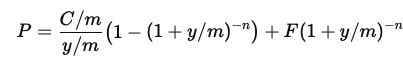

In [22]:
# Python implementation
def bond_price(face, coupon_rate, ytm, maturity, freq=1):
    """
    Calculate the price of a fixed-coupon bond, using the closed-form expression of P.
    
    Parameters:
        face (float): Face value of the bond
        coupon_rate (float): Annual coupon rate (e.g., 0.05 for 5%)
        ytm (float): Yield to maturity (as decimal)
        maturity (float): Time to maturity in years
        freq (int): Number of coupon payments per year (1, 2, 4, etc.)
        
    Returns:
        float: Present value (price) of the bond
    """
    # Find the total number of periods
    n = int(maturity * freq)
    f = np.pow(1 + ytm/freq, -n)

    # Find the Coupon payment per year
    c = face * coupon_rate / freq
    return (c * (1 - f)) * freq / ytm + face * f


In [23]:
# Example
print(bond_price(1000, 0.05, 0.045, 5, 1))

1021.9498837221463


# Duration

Here is the general formula for finding the Duration of a bond

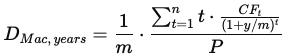

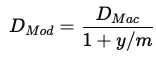

In [24]:
# Python implementation
def bond_duration(face, coupon_rate, ytm, maturity, freq=1):
    """
    Calculate the duration of a fixed-coupon bond.
    
    Parameters:
        face (float): Face value of the bond
        coupon_rate (float): Annual coupon rate (e.g., 0.05 for 5%)
        ytm (float): Yield to maturity (as decimal)
        maturity (float): Time to maturity in years
        freq (int): Number of coupon payments per year (1, 2, 4, etc.)
        
    Returns:
        np.array: [Dmac, Dmod]
    """
    # Get the Price of the bond
    P = bond_price(face, coupon_rate, ytm, maturity, freq)

    # Find the total number of periods and Coupon payment per period
    n = int(maturity * freq)
    c = face * coupon_rate / freq

    # Construct the series
    times = np.arange(1, n+1)
    factors = times * np.pow(1 + ytm/freq, -times)
    Dmac = (np.sum(factors * c) + factors[-1] * face) / (P * freq)
    Dmod = Dmac / (1 + ytm/freq)
    return np.array([Dmac, Dmod])


In [25]:
# Example
Dmac, Dmod = bond_duration(1000, 0.05, 0.045, 5, 1)
print(f"Macaulay Duration: {Dmac:.4f} years")
print(f"Modified Duration: {Dmod:.4f} years")


Macaulay Duration: 4.5515 years
Modified Duration: 4.3555 years


# Convexity

Here is the general formula for finding the Convexity of a bond

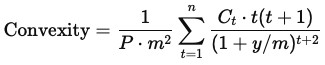

In [26]:
# Python implementation
def bond_convexity(face, coupon_rate, ytm, maturity, freq=1):
    """
    Calculate the convexity of a fixed-coupon bond.
    
    Parameters:
        face (float): Face value of the bond
        coupon_rate (float): Annual coupon rate (e.g., 0.05 for 5%)
        ytm (float): Yield to maturity (as decimal)
        maturity (float): Time to maturity in years
        freq (int): Number of coupon payments per year (1, 2, 4, etc.)
        
    Returns:
        float: Convexity (annualized)
    """
    # Get the Price of the bond
    P = bond_price(face, coupon_rate, ytm, maturity, freq)

    # Find the total number of periods and Coupon payment per period
    n = int(maturity * freq)
    c = face * coupon_rate / freq

    # Construct the series
    times = np.arange(1, n+1)
    factors = (np.pow(times, 2) + times) * np.pow(1 + ytm/freq, -times - 2)
    cash_flows = np.repeat(c, n)
    cash_flows[-1] += face
    return np.sum(factors * cash_flows) / (P * np.pow(freq, 2))


In [27]:
print(bond_duration(face = 1000, coupon_rate = 0.05, ytm = 0.06, maturity = 5, freq = 1))

[4.53465255 4.2779741 ]


# Price - YTM visualization

In [31]:
face = 10000
def price_rates_widget(face, maturity=5, coupon_rate=0.05, freq = 2):
    """
    Plot bond price vs interest rates for given bond parameters.

    Parameters:
        face (float): Face (par) value of the bond.
        maturity (int): Time to maturity in years.
        coupon_rate (float): Annual coupon rate as decimal (e.g., 0.05 for 5%).
        freq (int): Number of coupon payments per year.
    """
    # Calculate the Bond's price for ytm range 1%-20%
    ytm_sweep = np.linspace(0.01, 0.2, 100)
    prices = np.array([bond_price(face, coupon_rate, ytm, maturity, freq) for ytm in ytm_sweep])

    plt.figure(figsize=(8,5))
    plt.plot(ytm_sweep*100, prices, lw=2)
    plt.title("Bond Price Sensitivity to Interest Rates")
    plt.xlabel("Interest Rate (%)")
    plt.ylabel("Bond's Price ($)")
    plt.grid()
    plt.show()

# Widget Controls
display(widgets.interact(
    price_rates_widget,
    face=fixed(face),
    maturity=widgets.IntSlider(min=1, max=20, step=1, value=10, description='Maturity (yrs)'),
    coupon_rate=widgets.FloatSlider(min=0.01, max=0.20, step=0.005, value=0.05, description='Coupon Rate'),
    freq=widgets.Dropdown(options=[1, 2, 4, 12], value=2, description='Payments/year')
))

interactive(children=(IntSlider(value=10, description='Maturity (yrs)', max=20, min=1), FloatSlider(value=0.05…

<function __main__.price_rates_widget(face, maturity=5, coupon_rate=0.05, freq=2)>